In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
from wordcloud import WordCloud

## Что будет на дашборде

После запуска программы будет открываться страница с выбором типа спортивного питания - аминокислоты, протеины или энергия. После выбора типа открывается дашборд с аналитикой, который будет содержать три страницы: общая аналитика, анализ численных полей, анализ текстовых полей. С каждой страницы должна быть возможность вернуться на выбор типа.

## Общая аналитика

Содержит первые 5 строк датасета, возможность скачать как .xlsx, по каждому полю основную информацию (текстовое или численное, сколько заполнено, сколько уникальных значений), для количественных данных таблицу описательных статистик и корреляционную матрицу

In [2]:
acids_df = pd.read_csv('acids.csv')

In [3]:
acids_df

,name,Цель,Тип,Страна производитель,Количество в упаковке,Количество порций,"Срок годности, мес.",price,Форма выпуска,Диетические особенности,...,"Вес нетто, г",Минералы,Витамины,Штрихкод,Белок: грамм в 1 порции,"Объем, мл",Материал,Форма креатина,Вид транспортной системы,Вид белка
0,Аминокислота SupHerb L-Лизин 60 таб,"Мужское здоровье, Женское здоровье, Продлить м...",Аминокислоты отдельные,ИЗРАИЛЬ,60,60.0,36.0,1490,таблетки,без ароматизаторов,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Аминокислота GEON Essential Amino L-Lysine 90 ...,"Мужское здоровье, Женское здоровье, Продлить м...",Аминокислоты отдельные,Россия,90,15.0,24.0,690,капсулы,без ароматизаторов,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Аминокислота Таурин GEON Taurine Power 90 капсул,"Мужское здоровье, Женское здоровье, Продлить м...",Таурин,Россия,90,90.0,24.0,790,капсулы,"без ароматизаторов, без консервантов",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Аргинин Takem Инфинити Аргинин-1200 60 капсул,"Нарастить массу, Мужское здоровье, Улучшить вы...",Аргинин,Япония,60,20.0,36.0,8090,капсулы,"без ароматизаторов, без сахара",...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Аминокислотный комплекс Mutant GEAAR 378 г,Восстановление,Аминокислотные комплексы,Канада,378,30.0,24.0,1963,порошок,"без консервантов, без красителей, без лактозы,...",...,378.0,"калий, кальций, магний",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,BCAA 510 мг 180 капс,NaN,BCAA,Россия,180,36.0,NaN,1120,NaN,NaN,...,200.0,NaN,NaN,4602242023524,NaN,NaN,NaN,NaN,NaN,NaN
922,Аминокислоты BCAA CAPS 180 капсул,Восстановление,BCAA,Германия,180,30.0,3.0,1240,капсулы,"без ГМО, без ароматизаторов, без глютена, без ...",...,NaN,NaN,NaN,4260122321193,NaN,NaN,NaN,NaN,NaN,NaN
923,"BCAA ALLNUTRITION BCAA 2:1:1 1000 XtraCaps, 18...",Восстановление,BCAA,Польша,180,30.0,24.0,1510,капсулы,NaN,...,360.0,NaN,NaN,5902837705538,NaN,NaN,NaN,NaN,NaN,NaN
924,Аминокислоты Maxler BCAA + Glutamine 300 г,Восстановление,BCAA,Германия,300,30.0,24.0,1390,порошок,с сахарозаменителем,...,350.0,NaN,NaN,4260122320455,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
acids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      926 non-null    object 
 1   Цель                      922 non-null    object 
 2   Тип                       924 non-null    object 
 3   Страна производитель      925 non-null    object 
 4   Количество в упаковке     926 non-null    int64  
 5   Количество порций         917 non-null    float64
 6   Срок годности, мес.       444 non-null    float64
 7   price                     926 non-null    int64  
 8   Форма выпуска             436 non-null    object 
 9   Диетические особенности   375 non-null    object 
 10  Подходит для              440 non-null    object 
 11  Ингредиенты               687 non-null    object 
 12  Вес нетто, г              755 non-null    float64
 13  Минералы                  21 non-null     object 
 14  Витамины  

In [10]:
acids_df.nunique()

name                        882
Цель                         50
Тип                          34
Страна производитель         20
Количество в упаковке       114
Количество порций           106
Срок годности, мес.           9
price                       347
Форма выпуска                 8
Диетические особенности      99
Подходит для                  5
Ингредиенты                 582
Вес нетто, г                203
Минералы                     12
Витамины                     25
Штрихкод                    850
Белок: грамм в 1 порции       5
Объем, мл                     3
Материал                      2
Форма креатина                7
Вид транспортной системы      4
Вид белка                     1
dtype: int64

In [12]:
acids_df.select_dtypes(include=['float64', 'int64']).describe()

,Количество в упаковке,Количество порций,"Срок годности, мес.",price,"Вес нетто, г",Белок: грамм в 1 порции,"Объем, мл"
count,926.000000,917.000000,444.000000,926.000000,755.000000,6.000000,11.000000
mean,304.609071,60.664122,83.792793,1585.749460,442.842384,5.833333,757.272727
std,323.337478,55.947579,197.317341,948.210563,352.286650,6.493587,282.987311
min,1.000000,1.000000,3.000000,0.000000,10.000000,1.000000,330.000000
25%,100.000000,30.000000,24.000000,980.000000,200.000000,1.250000,500.000000
50%,250.000000,50.000000,24.000000,1440.000000,365.000000,4.000000,1000.000000
75%,400.000000,80.000000,24.000000,1990.000000,582.500000,6.750000,1000.000000
max,4000.000000,822.000000,730.000000,9021.000000,4000.000000,18.000000,1000.000000


In [13]:
acids_df.select_dtypes(include=['float64', 'int64']).corr()

,Количество в упаковке,Количество порций,"Срок годности, мес.",price,"Вес нетто, г",Белок: грамм в 1 порции,"Объем, мл"
Количество в упаковке,1.000000,0.141681,0.061977,0.290498,0.810803,0.972426,0.905564
Количество порций,0.141681,1.000000,0.053956,0.250013,0.120006,-0.689681,0.955909
"Срок годности, мес.",0.061977,0.053956,1.000000,0.080538,0.050847,-0.515530,0.485280
price,0.290498,0.250013,0.080538,1.000000,0.322934,0.132576,0.467081
"Вес нетто, г",0.810803,0.120006,0.050847,0.322934,1.000000,0.979351,NaN
Белок: грамм в 1 порции,0.972426,-0.689681,-0.515530,0.132576,0.979351,1.000000,NaN
"Объем, мл",0.905564,0.955909,0.485280,0.467081,NaN,NaN,1.000000


## Анализ численных полей

На странице выводятся описательные статистики, гистограмма, столбчатая диаграмма с выбором категориального поля, scatter plot с выбором второго количественного поля по оси х

In [14]:
acids_df['price'].describe()

count     926.000000
mean     1585.749460
std       948.210563
min         0.000000
25%       980.000000
50%      1440.000000
75%      1990.000000
max      9021.000000
Name: price, dtype: float64

<AxesSubplot: >

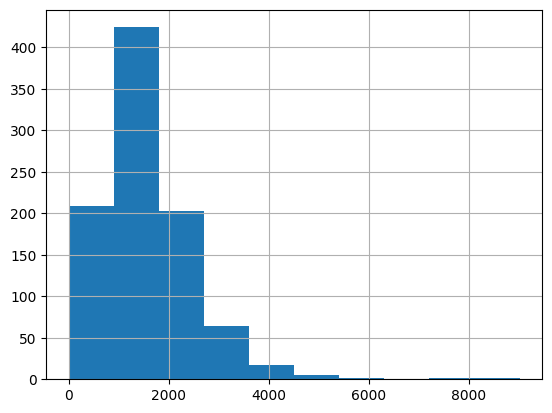

In [15]:
acids_df['price'].hist()

In [16]:
px.bar(acids_df, x='Форма выпуска', y='price')

In [19]:
df_for_bar = acids_df.groupby('Форма выпуска').sum().reset_index()[['Форма выпуска', 'price']]
px.bar(df_for_bar, x='Форма выпуска', y='price')

In [21]:
px.scatter(acids_df, x='Вес нетто, г', y='price')

## Анализ текстовых полей

Для всех полей с текстовыми данными выводить первые 10 уникальных значений, рисовать облако слов, bubble chart. Если значения полей не надо разделять по запятым (как в поле цель), то матрицу сопряженности, но надо поставить лимит на количество уникальных значений, в примере выше слишком много стран. В идеале добавить и поля с запятыми, сделать ручной выбор какие значения полей добавляем в матрицу сопряженности

In [5]:
all_vals = []
for val in acids_df['Цель'].dropna().values:
    all_vals.extend(val.split(', '))
unique_vals = set(all_vals)

In [6]:
from collections import Counter
pd.Series(Counter(all_vals))

Мужское здоровье                      73
Женское здоровье                      30
Продлить молодость                    44
Нарастить массу                      261
Улучшить выносливость                140
Восстановление                       481
Сбросить вес                         191
Избавление от стресса и депрессии     14
Подвижность и здоровье суставов        9
Красота и уход                         6
Прочность костей                       3
Эффективность сна                      2
dtype: int64

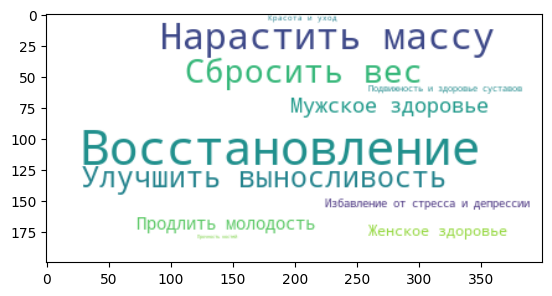

In [7]:
wc = WordCloud(background_color="white").generate_from_frequencies(dict(Counter(all_vals)))
plt.imshow(wc, interpolation='bilinear')

In [9]:
s = pd.Series(Counter(all_vals))
df_for_plot = pd.DataFrame({'goal': s.index, 'count': s.values}).sort_values('count').reset_index(drop=True)
px.scatter(df_for_plot, x="goal", y="count", 
           size="count", color="goal", size_max=60)

In [11]:
pd.crosstab(acids_df['Тип'], acids_df['Страна производитель'])

Страна производитель,Беларусь,Бельгия,Болгария,Великобритания,Венгрия,Германия,ИЗРАИЛЬ,Испания,Италия,Канада,Нидерланды,Польша,Россия,Румыния,США,ЧЕШСКАЯ РЕСПУБЛИКА,Чехия,Швейцария,Эстония,Япония
Тип,,,,,,,,,,,,,,,,,,,,
BCAA,0,6,0,7,13,16,0,4,0,5,0,43,72,2,66,0,7,2,0,0
"BCAA, Карнитин (L-карнитин)",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
"BCAA, Напитки",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
HMB,0,2,0,1,0,1,0,1,0,0,0,3,0,0,2,0,0,0,0,0
Аминокислотные комплексы,0,7,1,4,11,28,0,3,3,4,1,12,16,2,79,0,0,0,0,0
Аминокислоты отдельные,0,0,0,1,1,2,1,1,0,0,0,1,10,0,11,0,0,0,0,0
Аргинин,0,1,0,1,3,2,0,1,0,0,0,0,11,0,12,0,0,0,0,1
Батончики,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Бета-аланин,0,0,0,1,1,2,0,1,0,0,0,2,2,0,3,0,0,0,0,0


## Поля с большим количеством пропущенных значений

Поля, в которых заполнено менее 20% наблюдений (для аминокислот 'Минералы', 'Витамины', 'Белок: грамм в 1 порции', 'Объем, мл', 'Материал', 'Форма креатина', 'Вид транспортной системы', 'Вид белка'), по-умолчанию не будут учитываться в основных графиках. При их анализе выводить предупреждение, что заполнено мало значений